In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np

In [2]:
from sklearn import linear_model
%matplotlib inline

In [3]:
df = pd.read_csv('../data/housePrice.csv')

In [4]:
df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33


In [5]:
df.groupby(['Area']).count()

,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
Area,,,,,,,
"1,000",1,1,1,1,1,1,1
"16,160,000,000",1,1,1,1,1,1,1
"2,550,000,000",1,1,1,1,1,1,1
"3,310,000,000",1,1,1,1,1,1,1
"3,600",1,1,1,1,1,1,1
...,...,...,...,...,...,...,...
95,59,59,59,59,59,59,59
96,21,21,21,21,21,21,21
97,27,27,27,27,27,27,27


In [6]:
len(df['Area'])

3479

In [7]:
rs = df[(df['Area'].apply(lambda x: str(x).isdigit()))]
rs

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33
...,...,...,...,...,...,...,...,...
3474,86,2,True,True,True,Southern Janatabad,3.500000e+09,116666.67
3475,83,2,True,True,True,Niavaran,6.800000e+09,226666.67
3476,75,2,False,False,False,Parand,3.650000e+08,12166.67
3477,105,2,True,True,True,Dorous,5.600000e+09,186666.67


In [8]:
rs[['Area']].apply(pd.to_numeric)

,Area
0,63
1,60
2,79
3,95
4,123
...,...
3474,86
3475,83
3476,75
3477,105


In [9]:
rs.dtypes

Area           object
Room            int64
Parking          bool
Warehouse        bool
Elevator         bool
Address        object
Price         float64
Price(USD)    float64
dtype: object

In [10]:
rs.sort_values(by="Area")

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
223,100,2,True,True,True,Valiasr,2.300000e+09,76666.67
2843,100,2,True,True,True,Ostad Moein,3.150000e+09,105000.00
3407,100,2,True,True,True,Saadat Abad,4.550000e+09,151666.67
336,100,2,True,True,False,Southern Janatabad,3.800000e+09,126666.67
2733,100,2,True,True,True,Ostad Moein,3.150000e+09,105000.00
...,...,...,...,...,...,...,...,...
23,99,2,True,True,True,Moniriyeh,2.277000e+09,75900.00
456,99,3,True,True,True,North Program Organization,4.190000e+09,139666.67
2072,99,2,True,True,True,NaN,4.150000e+09,138333.33
1528,99,2,True,True,True,Punak,4.200000e+09,140000.00


In [11]:
msk = np.random.rand(len(rs)) < 0.8
train = rs[msk]
test = rs[~msk]

In [12]:
rs = rs.dropna()

In [13]:
cdf = rs[['Area','Room','Parking','Warehouse','Elevator','Address','Price']]
cdf.head(9)

,Area,Room,Parking,Warehouse,Elevator,Address,Price
0,63,1,True,True,True,Shahran,1.850000e+09
1,60,1,True,True,True,Shahran,1.850000e+09
2,79,2,True,True,True,Pardis,5.500000e+08
3,95,2,True,True,True,Shahrake Qods,9.025000e+08
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09
5,70,2,True,True,False,North Program Organization,2.050000e+09
6,87,2,True,True,True,Pardis,6.000000e+08
7,59,1,True,True,True,Shahran,2.150000e+09
8,54,2,True,True,False,Andisheh,4.930000e+08


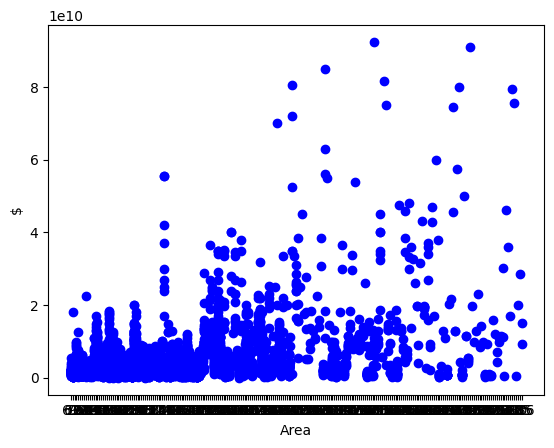

In [14]:
plt.scatter(cdf.Area, cdf.Price, color="blue")
plt.xlabel("Area")
plt.ylabel("$")
plt.show()

In [15]:
train_x = np.asanyarray(train[['Area','Room','Parking','Warehouse','Elevator']])
train_y = np.asanyarray(train[['Price']])

test_x = np.asanyarray(test[['Area','Room','Parking','Warehouse','Elevator']])
test_y = np.asanyarray(test[['Price']])

print(train_x[:3])

[['63' 1 True True True]
 ['60' 1 True True True]
 ['79' 2 True True True]]


In [16]:
clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x,train_y)
print("Coefficient: ", clf.coef_)
print("Intercept: ", clf.intercept_) 

Coefficient:  [[ 7.00731187e+07  1.51862731e+09 -1.32529809e+08  1.06926219e+09
   9.19706035e+08]]
Intercept:  [-6.9178185e+09]


In [17]:
print('%.2f'%clf.score(test_x,test_y))

0.55
